# Práctico 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Read the data from the CSV file
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Columnas:
+ **Identificatorios**: `show_id`
+ **Caracteristicas**: `type`,`title`, `duration`,`description`
+ **Fechas**: `date_added`, `release_year`
+ **Otros**: `director`, `cast`, `country`, `rating`, `listed_in`

In [16]:
#Colours
colours = ['#f5f5f1', '#df0707', '#ba0c0c', '#980a0a', '#780909' ,'#0b0000']

+ ### **Primera parte: Tipo de show más frecuente**

In [17]:
#Dictionary of the genres
replace_dict = {
    'International TV Shows': 'International Shows',
    'Korean TV Shows': 'Korean Shows',
    'Romantic TV Shows' : 'Romcoms',
    'British TV Shows': 'British Shows' ,
    'Crime TV Shows': 'Crime Shows',
    
}       

In [18]:
#Filter of TV shows that divides the listed_in data
df_tv = df[df['type'] == 'TV Show']

C:\Users\germa\AppData\Local\Temp\ipykernel_11816\1599438017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['listed_in'] = df_tv['listed_in'].astype(str)


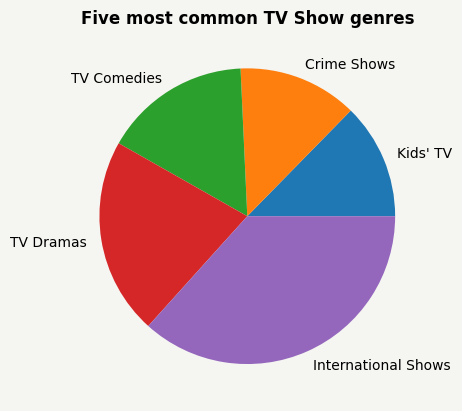

In [19]:
#Cast 'listed_in' to string
df_tv['listed_in'] = df_tv['listed_in'].astype(str)

#Dropping the null values and separating them
df_tv = df_tv.dropna(subset=['listed_in'])
div_genres = df_tv['listed_in'].str.split(', ').explode()

div_genres = div_genres.replace(replace_dict)
genre_count = div_genres.value_counts().head(5)
fig, ax = plt.subplots()

#Creating the chart
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10

genre_count_sort = genre_count.sort_values(ascending=True)
genre_count_sort.plot(kind='pie', color=bar_colours, ax=ax)

ax.set_title('Five most common TV Show genres', fontweight = 'bold')
ax.set_ylabel('')

ax.set_facecolor(colours[0])

plt.show()

+ ### **Segunda pregunta: Año con más pelis y series producidas**

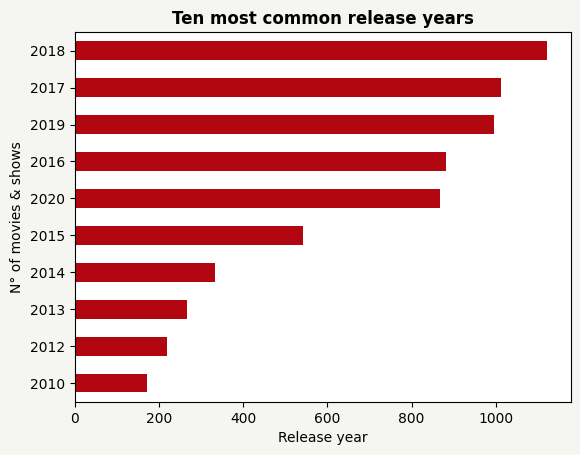

In [20]:
#Count release_year and plot the ten most common years
df['release_year'] = df['release_year'].astype(int)

release_year_count = df['release_year'].value_counts().head(10)

#Plotting
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10

release_year_sort = release_year_count.sort_values(ascending=True)
release_year_sort.plot(kind='barh', color=bar_colours, ax=ax)

ax.set_title('Ten most common release years', fontweight = 'bold')
ax.set_xlabel('Release year')
ax.set_ylabel('N° of movies & shows')
plt.show()

+ ### **Tercera pregunta: Países con más pelis y series producidas**

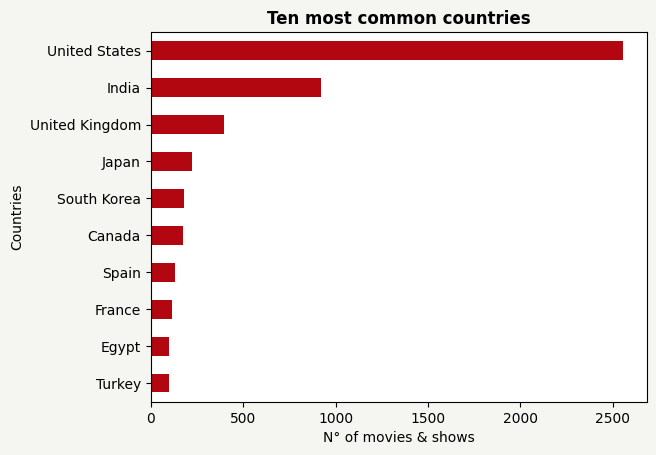

In [21]:
#Converting to string and discarding nan values
df['country'] = df['country'].astype(str)
df = df[df['country'].str.lower() != 'nan']

#Counting the countries and plotting the ten most common
country_count = df['country'].value_counts().head(10)
country_count_sorted = country_count.sort_values(ascending=True)

#Plotting the graph of the most common countries in a horizontal bar chart
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10
country_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)
ax.set_title('Ten most common countries', fontweight = 'bold')
ax.set_xlabel('N° of movies & shows')
ax.set_ylabel('Countries')
plt.show()

+ ### **Pregunta 4: Series y películas según rating**

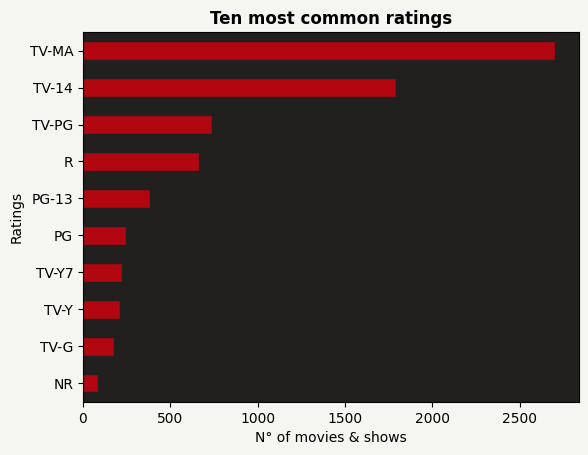

In [22]:
#Count the ratings and plot the ten most common
rating_count = df['rating'].value_counts().head(10)
rating_count_sorted = rating_count.sort_values(ascending=True)

#Plotting the graph of the most common ratings in a horizontal bar chart
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10
rating_count_sorted.plot(kind='barh', color=bar_colours, ax=ax, edgecolor=colours[3])
ax.set_title('Ten most common ratings', fontweight = 'bold')
ax.set_facecolor(colours[3])
ax.set_xlabel('N° of movies & shows')
ax.set_ylabel('Ratings')
plt.show()


+ ### **Pregunta 5: Audiencia objetivo segun el origen de los shows**

In [42]:
df_filled = df['country'].fillna('Unknown').str.split(', ').explode()
df_filled = df_filled.str.strip(',')

df_exploded = df_filled.explode('country')
uniqueCountryCount = df_exploded.value_counts()
print(uniqueCountryCount)
df_grouped = df_exploded.groupby(['country', 'rating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='country', columns='rating', values='count').fillna(0)

df_pivot.plot(kind='bar', stacked=True, color=[colours[1], colours[2], colours[3], colours[0]], figsize=(15, 10))


country
United States     3297
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Sudan                1
Panama               1
Uganda               1
East Germany         1
Montenegro           1
Name: count, Length: 117, dtype: int64


KeyError: 'country'

In [6]:

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month name and year from 'date_added'
df['month'] = df['date_added'].dt.month_name()
df['year'] = df['date_added'].dt.year

# Group by month and count the number of series and movies
distribution_by_month = df.groupby(['month', 'type']).size().unstack(fill_value=0)



distribution_by_month

type,Movie,TV Show
month,,
April,420,176
August,414,198
December,554,263
February,328,138
January,560,186
July,403,189
June,377,161
March,471,190
May,371,166


In [7]:
# Group by month and 'listed_in' category
categories_by_month = df.groupby(['month', 'listed_in']).size().unstack(fill_value=0)

categories_by_month

listed_in,Action & Adventure,"Action & Adventure, Anime Features, International Movies","Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy","Action & Adventure, Comedies","Action & Adventure, Comedies, Cult Movies","Action & Adventure, Comedies, Dramas","Action & Adventure, Comedies, Independent Movies","Action & Adventure, Comedies, International Movies","Action & Adventure, Cult Movies, International Movies","Action & Adventure, Dramas",...,"Comedies, Independent Movies, Thrillers","Crime TV Shows, TV Comedies, Teen TV Shows","Crime TV Shows, TV Horror, TV Mysteries","Docuseries, Kids' TV, Science & Nature TV","Docuseries, TV Sci-Fi & Fantasy","Reality TV, Science & Nature TV, TV Action & Adventure","TV Comedies, TV Dramas, TV Mysteries","TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers"
month,,,,,,,,,,,,,,,,,,,,,
April,5,1,1,3,1,6,1,5,1,1,...,0,0,0,0,0,0,0,0,0,0
August,11,1,0,1,0,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
December,14,1,0,4,0,4,2,7,0,3,...,0,0,0,0,0,0,0,0,0,0
February,5,3,0,1,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
January,15,1,3,7,0,1,1,4,0,3,...,0,0,0,0,0,0,0,0,0,0
July,7,1,1,3,0,4,0,3,1,3,...,0,0,0,0,0,0,0,0,0,0
June,3,2,1,2,0,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
March,8,1,0,2,0,4,0,8,0,1,...,0,0,0,0,0,0,0,0,0,0
May,3,1,0,1,1,1,0,6,1,1,...,0,0,0,0,0,0,0,0,0,0
